In [4]:
from google.colab import files
doc = files.upload()

Saving all_stocks_5yr.csv to all_stocks_5yr.csv


In [0]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn import utils

In [42]:
df= pd.read_csv("all_stocks_5yr.csv")
df.head(10)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL


In [43]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [48]:
df.shape

(619040, 7)

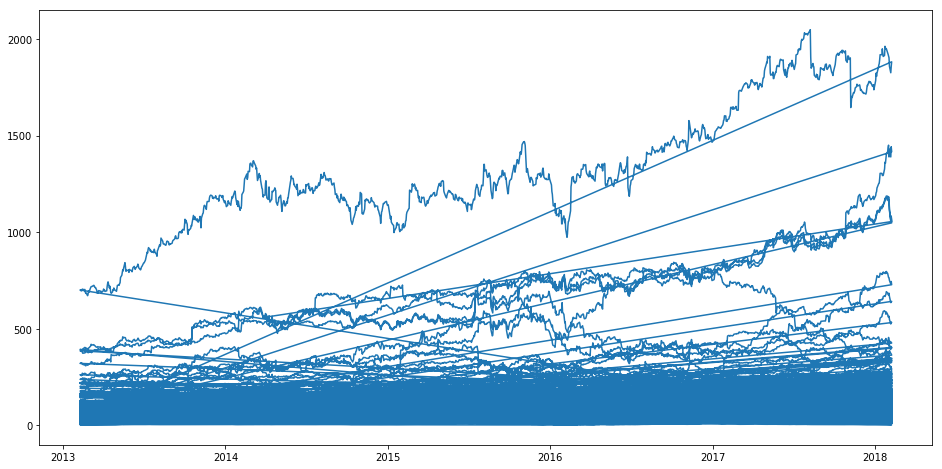

In [60]:
df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')
df.index = df['date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['close'])

In [70]:
df['HL_percentage'] = (df['high']-df['low'])/df['low']*100
df['percentage_change'] = (df['close']-df['open'])/df['open']*100

df = df[['HL_percentage', 'percentage_change', 'close', 'volume']]
df.head(5)

,HL_percentage,percentage_change,close,volume
date,,,,
2013-02-08,3.349282,-2.123424,14.75,8407500
2013-02-11,5.259467,-2.887844,14.46,8882000
2013-02-12,2.907801,-1.245675,14.27,8126000
2013-02-13,4.842105,2.517483,14.66,10259500
2013-02-14,13.677812,-6.358768,13.99,31879900


In [0]:
forcast_col = 'close'

focast_out = int(math.ceil(0.01*len(forcast_col)))

In [75]:
df['label'] = df[forcast_col].shift(-forcast_out)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
df.columns

Index(['HL_percentage', 'percentage_change', 'close', 'volume', 'label'], dtype='object')

In [77]:
df.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
df.isnull().sum()

HL_percentage        0
percentage_change    0
close                0
volume               0
label                0
dtype: int64

In [0]:
X = np.array(df.drop(['label'],1))
y = np.array(df['label'])

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [81]:
clf = LinearRegression()

clf.fit(X_train,y_train)

score = clf.score(X_test,y_test)
score

7.145793625040753e-05

In [90]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))


[14817  3261 25719 ... 14319  6996 25069]
continuous
multiclass
multiclass


In [92]:
clf1 = KNeighborsRegressor()

clf1.fit(X_train,y_train)

score1 = clf1.score(X_test,y_test)
score1

-0.19831555315061955

In [0]:
clf2 = SVR()

clf2.fit(X_train,y_train)

score2 = clf2.score(X_test,y_test)
score2

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
